<a href="https://colab.research.google.com/github/mhcox1251/Thinkful-final-Capstone---UFC-data/blob/master/Capstone_UFC_Fight_historical_data_1993_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This is it! The final capstone project.

My main research questions focus around looking at the evolution of fighting styles since the first [UFC](https://en.wikipedia.org/wiki/Ultimate_Fighting_Championship) fight until 2019.

When the UFC began, the idea was to have a tournament that would feature martial artists from different disciplines facing each other in a no-holds-barred combat to determine the best martial art.

Immediately, the Gracie family-- who developed [Brazilian jiu jitsu](https://en.wikipedia.org/wiki/Brazilian_jiu-jitsu)-- started to dominate. Before there were weight classes, you could see BJJ practitioners winning fights against martial artists from other disciplines that were much bigger in size.

As time went on, mixed martial arts began to distill into a discipline of its own as martial arts that proved more effective became apparent. There was a time when a black belt in jiu jitsu had an advantage against someone who did not. Now any fighter worth their salt is an elite jiu jitsu practitioner.

I want to look at the evolution of number of fights that end in K.O’s or T.K.O’s (knock out or technical knockout) vs. submission over the years.

Based on the above observations, I postulate that striking has now become more important again, and now the fighter with the best kickboxing/muay thai has the _upper hand._ So, to state my hypotheses:


*   Wins by submission over time. Hypothesis is that it's gone down over time.
* Number of takedowns over time. Hypothesis is that it’s gone down over time.

To start, import libraries:


In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
import math

# suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")


I am using a dataset found on Kaggle.com. H/t to Rajeev Warrier, who scraped the data from [UFC.com](https://www.ufc.com). The dataset contains historical fight data from 1993 until August of 2019.

https://www.kaggle.com/rajeevw/ufcdata/data#

I will be using the raw_total_fight_data.csv, which has 41 columns.

**<details><summary>Click to see column descriptions</summary>**
<p>

- R_ and B_ prefix signifies red and blue corner fighter stats respectively
- _opp_ containing columns is the average of damage done by the opponent on the fighter
- KD is number of knockdowns
- SIG_STR is no. of significant strikes 'landed of attempted'
- SIG_STR_pct is significant strikes percentage
- TOTAL_STR is total strikes 'landed of attempted'
- TD is no. of takedowns
- TD_pct is takedown percentages
- SUB_ATT is no. of submission attempts
- PASS is no. times the guard was passed?
- REV is the no. of Reversals landed
- HEAD is no. of significant strinks to the head 'landed of attempted'
- BODY is no. of significant strikes to the body 'landed of attempted'
- CLINCH is no. of significant strikes in the clinch 'landed of attempted'
- GROUND is no. of significant strikes on the ground 'landed of attempted'
- win_by is method of win
- last_round is last round of the fight (ex. if it was a KO in 1st, then this will be 1)
- last_round_time is when the fight ended in the last round
- Format is the format of the fight (3 rounds, 5 rounds etc.)
- Referee is the name of the Ref
- date is the date of the fight
- location is the location in which the event took place
- Fight_type is which weight class and whether it's a title bout or not
- Winner is the winner of the fight
- Stance is the stance of the fighter (orthodox, southpaw, etc.)
- Height_cms is the height in centimeter
- Reach_cms is the reach of the fighter (arm span) in centimeter
- Weight_lbs is the weight of the fighter in pounds (lbs)
- age is the age of the fighter
- title_bout Boolean value of whether it is title fight or not
- weight_class is which weight class the fight is in (Bantamweight, heavyweight, Women's flyweight, etc.)
- no_of_rounds is the number of rounds the fight was scheduled for
- current_lose_streak is the count of current concurrent losses of the fighter
- current_win_streak is the count of current concurrent wins of the fighter
- draw is the number of draws in the fighter's ufc career
- wins is the number of wins in the fighter's ufc career
- losses is the number of losses in the fighter's ufc career
- total_rounds_fought is the average of total rounds fought by the fighter
- total_time_fought(seconds) is the count of total time spent fighting in seconds
- total_title_bouts is the total number of title bouts taken part in by the fighter
- win_by_Decision_Majority is the number of wins by majority judges decision in the fighter's ufc career
- win_by_Decision_Split is the number of wins by split judges decision in the fighter's ufc career
- win_by_Decision_Unanimous is the number of wins by unanimous judges decision in the fighter's ufc career
- win_by_KO/TKO is the number of wins by knockout in the fighter's ufc career
- win_by_Submission is the number of wins by submission in the fighter's ufc career
- win_by_TKO_Doctor_Stoppage is the number of wins by doctor stoppage in the fighter's ufc career

</p>
</details>


---


**Acknowledgements:**

Credit to the author of the dataset, who did the hard part of scraping fight data from UFC.com.

Also, credit to the Kaggle users who created kernels before me-- I took inspiration from others' use of the dataset to help guide me and learn as I go.

In [0]:
#@title
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Import the data, and delimit the raw csv so I can store it as a usable DataFrame:

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/Colab datasets/raw_total_fight_data.csv', delimiter=';')

Checking it out:

In [0]:
df.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52%,47%,99 of 182,59 of 121,1 of 4,0 of 2,25%,0%,1,0,1,0,0,0,73 of 150,35 of 89,13 of 16,7 of 8,4 of 5,15 of 22,45 of 118,54 of 116,19 of 23,2 of 2,26 of 30,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72%,16%,37 of 40,42 of 52,2 of 2,0 of 0,100%,0%,1,0,3,0,0,0,4 of 5,0 of 7,4 of 6,0 of 2,0 of 0,2 of 3,5 of 8,2 of 12,2 of 2,0 of 0,1 of 1,0 of 0,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,52%,36%,104 of 200,68 of 185,0 of 0,1 of 1,0%,100%,0,0,0,0,0,0,65 of 144,43 of 152,25 of 37,15 of 23,14 of 19,10 of 10,103 of 198,68 of 184,1 of 2,0 of 1,0 of 0,0 of 0,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,38%,29%,76 of 195,58 of 192,0 of 3,1 of 3,0%,33%,0,0,0,1,0,0,42 of 145,40 of 166,15 of 24,13 of 19,16 of 23,3 of 4,60 of 173,42 of 167,9 of 15,10 of 12,4 of 4,4 of 10,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","Chicago, Illinois, USA",Bantamweight Bout,Petr Yan
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,44%,59%,66 of 146,81 of 131,0 of 0,2 of 2,0%,100%,0,0,0,0,0,0,39 of 114,65 of 114,6 of 7,7 of 8,19 of 23,1 of 1,50 of 126,62 of 111,14 of 18,5 of 6,0 of 0,6 of 6,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov


#General cleaning

In [0]:
df.columns

Index(['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV', 'R_HEAD', 'B_HEAD', 'R_BODY',
       'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH',
       'B_CLINCH', 'R_GROUND', 'B_GROUND', 'win_by', 'last_round',
       'last_round_time', 'Format', 'Referee', 'date', 'location',
       'Fight_type', 'Winner'],
      dtype='object')

In [0]:
columns = ['R_SIG_STR.', 'B_SIG_STR.', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_HEAD', 'B_HEAD', 'R_BODY','B_BODY', 'R_LEG', 'B_LEG', 
        'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH','B_CLINCH', 'R_GROUND', 'B_GROUND']

splitting 

In [0]:
attemp = '_att'
landed = '_landed'

for column in columns:
    df[column+attemp] = df[column].apply(lambda X: int(X.split('of')[1]))
    df[column+landed] = df[column].apply(lambda X: int(X.split('of')[0]))
    
df.drop(columns, axis=1, inplace=True)

Convert date to datetime type.

In [0]:
df['date'] = df['date'].map(pd.to_datetime)

def get_dom(dt):
  return dt.day

def get_m(dt):
  return dt.month

def get_year(dt):
  return dt.year

df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year']= df['date'].dt.year

print(df['date'].dtypes)
df.columns

datetime64[ns]


Index(['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR_pct',
       'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV', 'win_by', 'last_round',
       'last_round_time', 'Format', 'Referee', 'date', 'location',
       'Fight_type', 'Winner', 'R_SIG_STR._att', 'R_SIG_STR._landed',
       'B_SIG_STR._att', 'B_SIG_STR._landed', 'R_TOTAL_STR._att',
       'R_TOTAL_STR._landed', 'B_TOTAL_STR._att', 'B_TOTAL_STR._landed',
       'R_TD_att', 'R_TD_landed', 'B_TD_att', 'B_TD_landed', 'R_HEAD_att',
       'R_HEAD_landed', 'B_HEAD_att', 'B_HEAD_landed', 'R_BODY_att',
       'R_BODY_landed', 'B_BODY_att', 'B_BODY_landed', 'R_LEG_att',
       'R_LEG_landed', 'B_LEG_att', 'B_LEG_landed', 'R_DISTANCE_att',
       'R_DISTANCE_landed', 'B_DISTANCE_att', 'B_DISTANCE_landed',
       'R_CLINCH_att', 'R_CLINCH_landed', 'B_CLINCH_att', 'B_CLINCH_landed',
       'R_GROUND_att', 'R_GROUND_landed', 'B_GROUND_att', 'B_GROUND_landed',
       'day'

##Weight class
Creating weight class column.

In [0]:
def Division(X):
    for Division in weight_classes:
        if Division in X:
            return Division
    if X == 'Catch Weight Bout' or 'Catchweight Bout':
        return 'Catch Weight'
    else:
        return 'Open Weight'
weight_classes = ['Women\'s Strawweight', 'Women\'s Bantamweight', 
                  'Women\'s Featherweight', 'Women\'s Flyweight', 'Lightweight', 
                  'Welterweight', 'Middleweight','Light Heavyweight', 
                  'Heavyweight', 'Featherweight','Bantamweight', 'Flyweight', 'Open Weight']

df['weight_class'] = df['Fight_type'].apply(Division)

#Exploratory data analysis

Checking data types and nulls:

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 63 columns):
R_fighter              5144 non-null object
B_fighter              5144 non-null object
R_KD                   5144 non-null int64
B_KD                   5144 non-null int64
R_SIG_STR_pct          5144 non-null object
B_SIG_STR_pct          5144 non-null object
R_TD_pct               5144 non-null object
B_TD_pct               5144 non-null object
R_SUB_ATT              5144 non-null int64
B_SUB_ATT              5144 non-null int64
R_PASS                 5144 non-null int64
B_PASS                 5144 non-null int64
R_REV                  5144 non-null int64
B_REV                  5144 non-null int64
win_by                 5144 non-null object
last_round             5144 non-null int64
last_round_time        5144 non-null object
Format                 5144 non-null object
Referee                5121 non-null object
date                   5144 non-null datetime64[ns]
location      

I'm going to drop the nulls in the Winner column. Other than that, none of the columns I'm interested for the purpose of this analysis have nulls.

In [0]:
df.dropna(subset=['Winner'], inplace=True)

In [0]:
df.describe()

,R_KD,B_KD,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,last_round,R_SIG_STR._att,R_SIG_STR._landed,B_SIG_STR._att,B_SIG_STR._landed,R_TOTAL_STR._att,R_TOTAL_STR._landed,B_TOTAL_STR._att,B_TOTAL_STR._landed,R_TD_att,R_TD_landed,B_TD_att,B_TD_landed,R_HEAD_att,R_HEAD_landed,B_HEAD_att,B_HEAD_landed,R_BODY_att,R_BODY_landed,B_BODY_att,B_BODY_landed,R_LEG_att,R_LEG_landed,B_LEG_att,B_LEG_landed,R_DISTANCE_att,R_DISTANCE_landed,B_DISTANCE_att,B_DISTANCE_landed,R_CLINCH_att,R_CLINCH_landed,B_CLINCH_att,B_CLINCH_landed,R_GROUND_att,R_GROUND_landed,B_GROUND_att,B_GROUND_landed,day,month,year
count,5061.000000,5061.000000,5061.000000,5061.000000,5061.00000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000
mean,0.254495,0.179214,0.513140,0.361786,1.40407,0.829283,0.141276,0.133966,2.285122,77.046829,34.330172,71.254693,29.110255,99.838569,54.640387,88.899625,44.810117,2.957518,1.256866,2.667062,0.897056,60.373246,22.044062,56.159059,18.302114,9.803596,6.798854,8.845287,5.923730,6.869986,5.487255,6.250346,4.884410,59.358032,22.282158,58.184549,20.407825,8.013238,5.503063,7.324837,4.870974,9.675558,6.544952,5.745307,3.831456,15.325825,6.655997,2012.284331
std,0.525667,0.456930,0.951634,0.812035,2.30306,1.651236,0.426399,0.415408,1.002918,66.228264,29.053506,64.645559,27.272286,75.584462,43.914918,72.448751,38.874437,3.687761,1.825818,3.667451,1.518097,54.169165,20.346821,53.629992,19.216640,10.905276,7.727233,10.119346,7.197257,9.372279,7.547746,8.281937,6.606671,63.039691,25.209859,60.646353,23.233096,11.112950,8.029727,9.713667,6.924248,14.882898,10.056039,11.428872,7.900608,8.551376,3.458280,5.337129
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1993.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,26.000000,12.000000,20.000000,8.000000,36.000000,20.000000,29.000000,14.000000,0.000000,0.000000,0.000000,0.000000,20.000000,7.000000,15.000000,4.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,12.000000,4.000000,12.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,4.000000,2010.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.000000,61.000000,27.000000,54.000000,22.000000,88.000000,46.000000,75.000000,36.000000,2.000000,1.000000,1.000000,0.000000,47.000000,17.000000,41.000000,13.000000,6.000000,4.000000,5.000000,4.000000,3.000000,3.000000,3.000000,2.000000,38.000000,13.000000,37.000000,13.000000,4.000000,3.000000,4.000000,2.000000,4.000000,2.000000,1.000000,1.000000,15.000000,7.000000,2014.000000
75%,0.000000,0.000000,1.000000,0.000000,2.00000,1.000000,0.000000,0.000000,3.000000,109.000000,49.000000,104.000000,43.000000,147.000000,78.000000,133.000000,66.000000,4.000000,2.000000,4.000000,1.000000,85.000000,31.000000,81.000000,26.000000,14.000000,10.000000,13.000000,9.000000,9.000000,8.000000,9.000000,7.000000,85.000000,31.000000,86.000000,29.000000,11.000000,7.000000,10.000000,7.000000,13.000000,9.000000,6.000000,4.000000,22.000000,10.000000,2016.000000
max,5.000000,4.000000,10.000000,7.000000,26.00000,14.000000,5.000000,3.000000,5.000000,490.000000,290.000

Group by year, and find out how many fights happened each year.

How many years are in the dataset?

In [0]:
# find the frequency of each value in the column
year_counts = df['year'].value_counts()

year_counts.nunique()

25

How many fights happened in each year?

In [0]:
year_counts.sort_values()

1993      8
1998     20
1994     29
1995     31
1996     36
1997     38
2001     39
2003     39
2004     39
2000     40
1999     41
2002     52
2005     79
2006    158
2007    169
2008    201
2009    213
2019    223
2010    250
2011    295
2012    333
2013    376
2017    440
2015    464
2018    471
2016    483
2014    494
Name: year, dtype: int64

Let's see that visually:


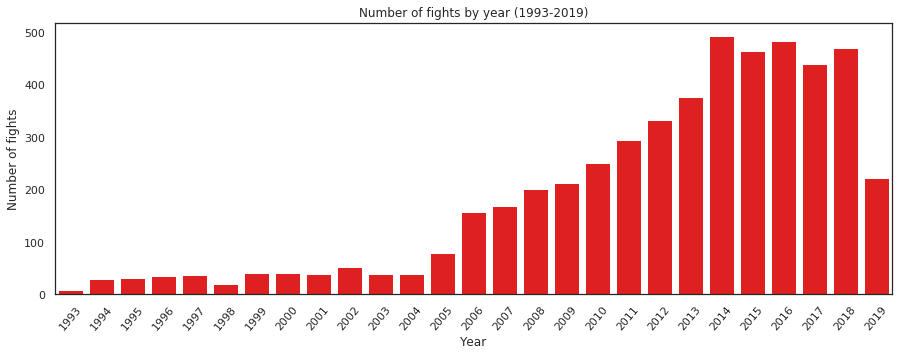

In [0]:
values = df['year'].value_counts().sort_values(ascending=False)
labels = values.index

clrs=["red"]

sns.set_style("white")
plt.figure(figsize = (15,5))
sns.barplot(y=values, x=labels, palette=clrs)
plt.xticks(rotation=50)
plt.xlabel('Year')
plt.ylabel('Number of fights')
plt.title('Number of fights by year (1993-2019)');

Since there are many more fights per year in recent years, there is certainly more submissions by volume than in the beginning. So, we will need to test the proportion of fights ending in submissions, and whether that's gone down over time.

##Analysis of finish type

Order the data to evaluate the change in proportion of submissions vs other finish types over time.

In [0]:
df['is submission?'] = np.where(df['win_by']=='Submission', 1, 0)

df['is KO/TKO?'] = np.where(df['win_by']=='KO/TKO', 1, 0)

df['is decision - split?'] = np.where(df['win_by']=='Decision - Split', 1, 0)

df['is decision - unanimous?'] = np.where(df['win_by']=='Decision - Unanimous', 1, 0)

Aggregate win types for plotting:

Submissions:

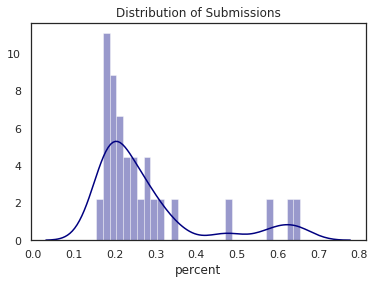

In [0]:
aggs_df = df.groupby('year')['is submission?'].agg(['sum','count'])
aggs_df['percent'] = aggs_df['sum']/aggs_df['count']

sns.distplot(aggs_df['percent'], bins=30, color='navy')
plt.title('Distribution of Submissions');

Aggregate KO/TKOs, split decisions, and unanimous decisions, too:

In [0]:
aggko_df = df.groupby('year')['is KO/TKO?'].agg(['sum','count'])
aggko_df['percent'] = aggko_df['sum']/aggko_df['count']

aggds_df = df.groupby('year')['is decision - split?'].agg(['sum','count'])
aggds_df['percent'] = aggds_df['sum']/aggds_df['count']

aggdu_df = df.groupby('year')['is decision - split?'].agg(['sum','count'])
aggdu_df['percent'] = aggdu_df['sum']/aggdu_df['count']

aggs_df['type'] = 'submission'
aggko_df['type'] = 'KO/TKO'
aggds_df['type'] = 'Split Decision'
aggdu_df['type'] = 'Unanimous Decision'

#wrap them all up in one data frame for plotting


Wrap them all up in one for plotting:

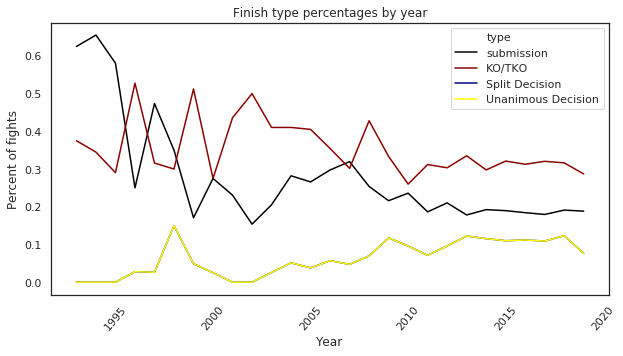

In [0]:
agg_df = aggs_df.append(other=[aggko_df, aggds_df, aggdu_df])

values=agg_df['percent']
labels=agg_df.index
hue=agg_df['type']

clrs= ["black", "darkred","navy", "yellow"]

plt.figure(figsize= (10,5))
sns.set_style("white")
sns.lineplot(x=labels, y=values, hue=hue, palette=clrs)
plt.xticks(rotation=50)
plt.xlabel('Year')
plt.ylabel('Percent of fights')
plt.title('Finish type percentages by year');

Drilling into finish types:

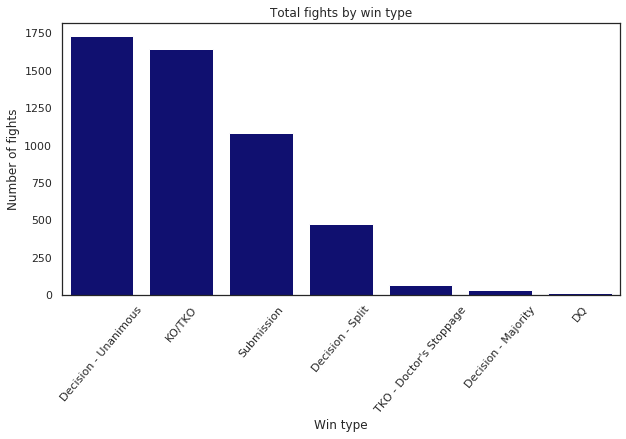

In [0]:
win_by = df['win_by'].value_counts().sort_values(ascending=False)
win_counts = df['win_by'].value_counts()
sorted_wins = df['win_by'].sort_values(ascending=False)

plt.figure(figsize= (10,5))

clrs = ['navy' for y in values]

sns.barplot(x=win_counts.index, y=win_counts.values, palette=clrs)
plt.xticks(rotation=50)
plt.xlabel('Win type')
plt.ylabel('Number of fights')
plt.title('Total fights by win type');

In [0]:
most_submissions_df = df.groupby('Winner')['is submission?'].agg('count')
top_15_sub = most_submissions_df.nlargest(15)

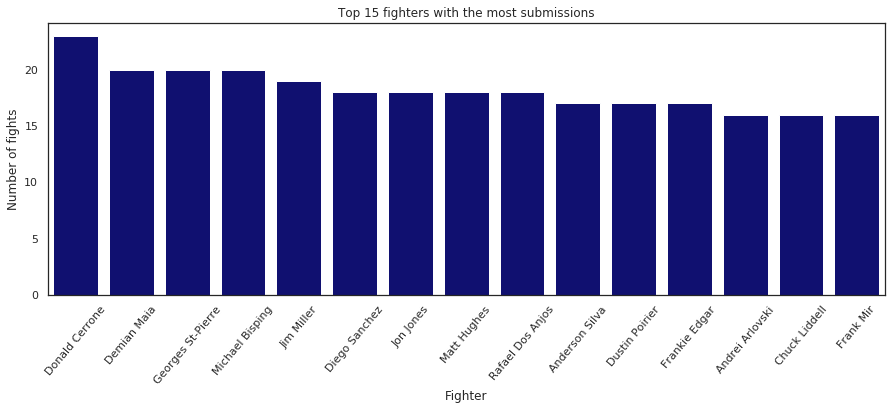

In [0]:
index = top_15_sub.index
values = top_15_sub.values

plt.figure(figsize= (15,5))
sns.barplot(x=index, y=values, palette=clrs)
plt.xticks(rotation=50)
plt.xlabel('Fighter')
plt.ylabel('Number of fights')
plt.title('Top 15 fighters with the most submissions');

##Analysis of fight finish type by weight class


In [0]:
#fights in weightclass
df['weight_class'].value_counts()

Lightweight              971
Welterweight             956
Middleweight             717
Heavyweight              497
Light Heavyweight        492
Featherweight            434
Bantamweight             371
Flyweight                185
Women's Strawweight      142
Women's Bantamweight     109
Open Weight               92
Women's Flyweight         49
Catch Weight              36
Women's Featherweight     10
Name: weight_class, dtype: int64

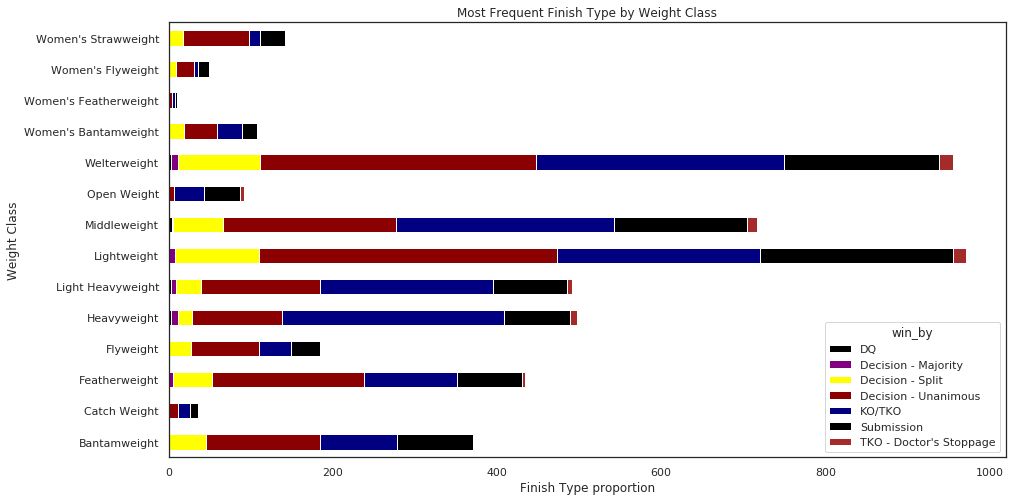

In [0]:
clrs= ["black", "purple", "yellow", "darkred","navy", "black", "brown", "green", "pink"]

bar = df.groupby(['weight_class', 'win_by']).size().reset_index().pivot(columns='win_by', index='weight_class', values=0)
bar.plot(stacked=True, figsize=(15,8), kind="barh", color=clrs)
plt.xlabel('Finish Type proportion')
plt.ylabel('Weight Class')
plt.title('Most Frequent Finish Type by Weight Class');

##Analysis of takedowns

Split the number of takedown columns from the string in R_TD and B_TD columns, convert to integers, and concatentate so we can look at number of total takedowns overtime.

In [0]:
df['Total TD'] = df['B_TD_landed']+df['R_TD_landed']

df['Total TD attempted'] = df['R_TD_att']+df['B_TD_att']

aggtd_df = df.groupby('year')['Total TD'].agg(['sum','count'])
aggtd_df['percent'] = df['Total TD']/df['Total TD attempted']

aggtd_df = aggtd_df.dropna()
aggtd_df

,sum,count,percent
year,,,
1995,22,31,0.666667
1996,34,36,0.666667
1997,48,38,0.750000
1998,40,20,0.571429
1999,69,41,0.111111
2000,74,40,0.000000
2001,96,39,0.230769
2003,79,39,0.000000
2004,82,39,0.363636


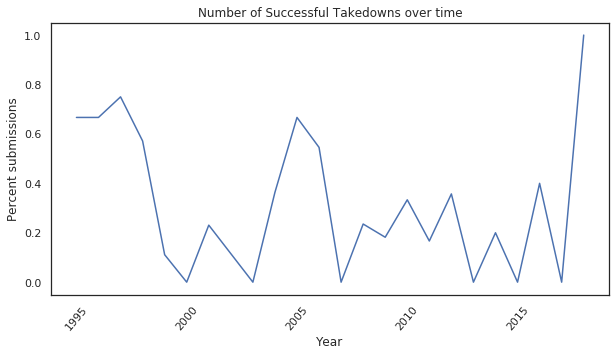

In [0]:
index=aggtd_df.index
values= aggtd_df['percent'].values

plt.figure(figsize= (10,5))
sns.set_style("white")
sns.lineplot(x=index, y=values, palette=clrs)
plt.xticks(rotation=50)
plt.xlabel('Year')
plt.ylabel('Percent submissions')
plt.title('Number of Successful Takedowns over time');

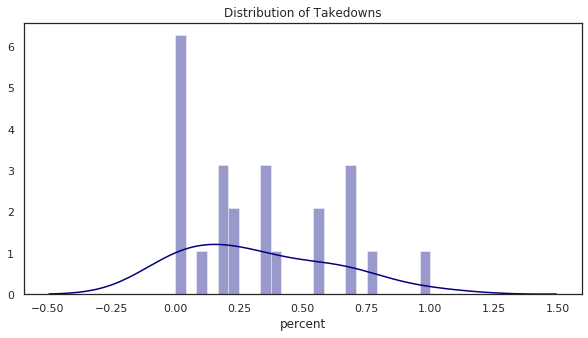

In [0]:
plt.figure(figsize=(10,5))
sns.distplot(aggtd_df['percent'], bins=24, color='navy')
plt.title('Distribution of Takedowns');

#Hypothesis Testing

Now let's prepare our data for some hypothesis testing.

I want to see if the number of fights that end in submissions has gone down over time. Since the overall number of fights per year has increased, I will use a z-test to evaluate if there is a statistically significant difference in proportion of fights ending in submission.

Since the UFC became officially regulated and standardized in 2000, I will test all fights from 2000-2009 against all fights from 2010-2019.

Separating 2000-2009 from 2010-2019 to prepare for hypothesis testing:

In [0]:
before_2010 = aggs_df[(aggs_df.index >= 2000) & (aggs_df.index <= 2009)]
after_2010 = aggs_df[aggs_df.index >= 2010]

before_2010['type'] = "before 2010"
after_2010['type'] = "after 2010"

Let's run descriptive statistics on our two samples:

In [0]:
before_2010.sum()

sum                                                      266
count                                                   1029
percent                                              2.49931
type       before 2010before 2010before 2010before 2010be...
dtype: object

In [0]:
after_2010.sum()

sum                                                      734
count                                                   3829
percent                                              1.93604
type       after 2010after 2010after 2010after 2010after ...
dtype: object

In [0]:
#before 2010

before_2010.describe()

,sum,count,percent
count,10.00000,10.000000,10.000000
mean,26.60000,102.900000,0.249931
std,20.16157,73.423354,0.049206
min,8.00000,39.000000,0.153846
25%,9.50000,39.250000,0.219664
50%,16.00000,65.500000,0.259777
75%,46.75000,166.250000,0.280288
max,54.00000,213.000000,0.319527


In [0]:
#after 2010
after_2010.describe()

,sum,count,percent
count,10.00000,10.000000,10.000000
mean,73.40000,382.900000,0.193604
std,17.68364,101.902404,0.017315
min,42.00000,223.000000,0.178191
25%,61.00000,304.500000,0.184809
50%,74.50000,408.000000,0.188998
75%,88.75000,469.250000,0.192001
max,95.00000,494.000000,0.236000


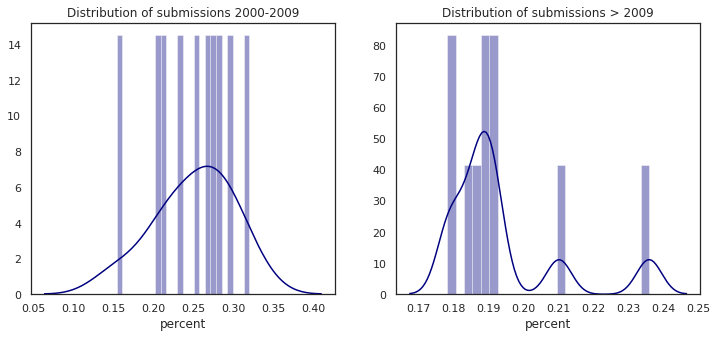

In [0]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.distplot(before_2010['percent'], bins=24, ax=ax[0], color='navy')
ax[0].set_title('Distribution of submissions 2000-2009')
sns.distplot(after_2010['percent'], bins=24, ax=ax[1], color='navy')
ax[1].set_title('Distribution of submissions > 2009');

##Submissions hypothesis testing

The z-test.

I want to examine whether there is a significant difference in amount of fights ending in submissions from before and after 2010. So, my hypotheses are thus:

- Ho: p1 - p2 = 0
- Ha: p1 - p2 ≠ 0

To conduct a z-test, I'm importing statsmodel library to use the z-test function: https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

In [0]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

sm.stats.ztest(x1=before_2010['percent'], x2=after_2010['percent'])

(3.414654984537285, 0.0006386284934845202)

In [0]:
# Calculate the standard error and compute the confidence intervals
#confidence intervals

sample_1_n = before_2010.shape[0]
sample_2_n = after_2010.shape[0]
sample_1_mean = before_2010['percent'].mean()
sample_2_mean = after_2010['percent'].mean()
sample_1_var = before_2010['percent'].var()
sample_2_var = after_2010['percent'].var()

import math

std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

#Cohen's d function

def get_cohens_d(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    s_pooled = math.sqrt((sample_1_var + sample_2_var)/2)
    cohens = (sample_1_mean - sample_2_mean) / s_pooled
    
    return("Cohen's d is: "+str(cohens)+ ".")
  
print(get_cohens_d(before_2010['percent'], after_2010['percent']))

The difference in means at the 95% confidence interval is between -0.0886580451744588 and -0.02399537602011515.
Cohen's d is: 1.527080133026773.


*How to plot the results of z-test? bar plot with error bars. Must calculate confidence interval.*

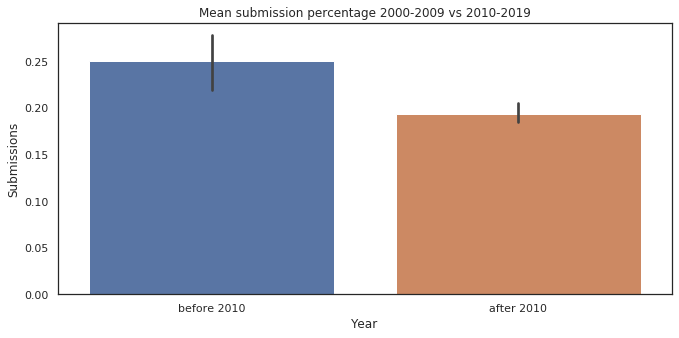

In [0]:
submissions_test= pd.concat([before_2010, after_2010])

plt.figure(figsize = (11,5))
sns.barplot(x="type", y="percent", data=submissions_test)
plt.xlabel('Year')
plt.ylabel('Submissions')
plt.title('Mean submission percentage 2000-2009 vs 2010-2019');


##Takedowns hypothesis testing

Has number of successful takedowns over the years gone down?

Our hypotheses:
- Ho: p1 - p2 = 0
- Ha: p1 - p2 ≠ 0

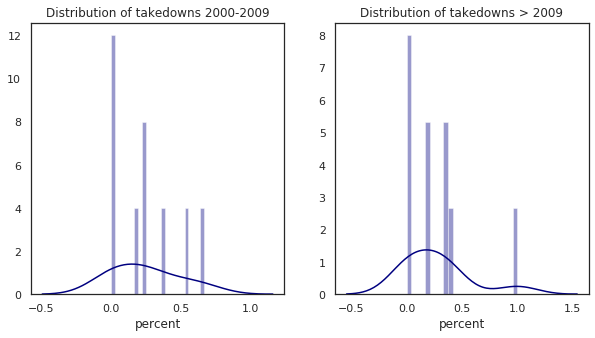

In [0]:
td_before_2010 = aggtd_df[(aggtd_df.index >= 2000) & (aggtd_df.index <= 2009)]
td_after_2010 = aggtd_df[aggtd_df.index >= 2010]

td_before_2010['type'] = "before 2010"
td_after_2010['type'] = "after 2010"

fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.distplot(td_before_2010['percent'], bins=24, ax=ax[0], color='navy')
ax[0].set_title('Distribution of takedowns 2000-2009')
sns.distplot(td_after_2010['percent'], bins=24, ax=ax[1], color='navy')
ax[1].set_title('Distribution of takedowns > 2009');

In [0]:
sm.stats.ztest(x1=td_before_2010['percent'], x2=td_after_2010['percent'])

(-0.1959633255263911, 0.844638871395421)

In [0]:
#confidence intervals

sample_1_n = td_before_2010.shape[0]
sample_2_n = td_after_2010.shape[0]
sample_1_mean = td_before_2010['percent'].mean()
sample_2_mean = td_after_2010['percent'].mean()
sample_1_var = td_before_2010['percent'].var()
sample_2_var = td_after_2010['percent'].var()

std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")
print(get_cohens_d(td_before_2010['percent'], td_after_2010['percent']))

The difference in means at the 95% confidence interval is between -0.2335523068755232 and 0.28544202935348106.
Cohen's d is: -0.09237799756238514.


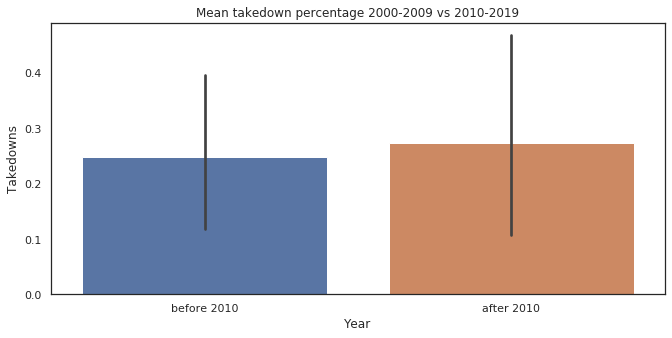

In [0]:
takedowns_test= pd.concat([td_before_2010, td_after_2010])

plt.figure(figsize = (11,5))
sns.barplot(x="type", y="percent", data=takedowns_test)
plt.xlabel('Year')
plt.ylabel('Takedowns')
plt.title('Mean takedown percentage 2000-2009 vs 2010-2019');


Doesn't look like the number of successful takedowns over time has changed very significantly. We've failed to reject the null.

#Conclusion

- Found that my original hypothesis that the proportion of fights ending in takedowns has gone down was supported by a z-test. I was able to reject the null.
- Failed to reject the null hypothesis that there was a change in proportion of successful takedowns over time.

I'm not surprised by my findings on submissions. My guess as to why this is the case is that as time has gone on, more fighters are proficient at brazilian jiu jitsu, so the skills gaps between those who come from a BJJ background and those who don't has narrowed significantly. Also, as it develops as a sport, mixed martial arts will continue to evolve and refine as fighters introduce new techniques.

Brazilian Jiu Jitsu has become ingrained into the sport-- where other types of martial arts sank when put to the test, brazilian jiu jitsu rose to the top. But now and going forward, in order for a fighter to stay on top they'll need to have elite level ground AND striking abilities.

I think anyone who's interested in mixed martials arts would find valuable insightsd here. The intended audience cna glean insights that help them think about where the future of the sport is going. It could be used by aspiring fighters to understand what fighting styles are important.

As I continue to improve my data science and analytics abilities, I'm excited to continue researching this topic to uncover more insights about UFC and mixed martial arts.